In [83]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [84]:
num_qubits=2
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [85]:
# t=np.linspace(-10,-1, 20)
t=np.linspace(0.0001,2, 50)
print(t)

[1.00000000e-04 4.09142857e-02 8.17285714e-02 1.22542857e-01
 1.63357143e-01 2.04171429e-01 2.44985714e-01 2.85800000e-01
 3.26614286e-01 3.67428571e-01 4.08242857e-01 4.49057143e-01
 4.89871429e-01 5.30685714e-01 5.71500000e-01 6.12314286e-01
 6.53128571e-01 6.93942857e-01 7.34757143e-01 7.75571429e-01
 8.16385714e-01 8.57200000e-01 8.98014286e-01 9.38828571e-01
 9.79642857e-01 1.02045714e+00 1.06127143e+00 1.10208571e+00
 1.14290000e+00 1.18371429e+00 1.22452857e+00 1.26534286e+00
 1.30615714e+00 1.34697143e+00 1.38778571e+00 1.42860000e+00
 1.46941429e+00 1.51022857e+00 1.55104286e+00 1.59185714e+00
 1.63267143e+00 1.67348571e+00 1.71430000e+00 1.75511429e+00
 1.79592857e+00 1.83674286e+00 1.87755714e+00 1.91837143e+00
 1.95918571e+00 2.00000000e+00]


In [86]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits-1)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    return qml.probs(wires=[0])
    # return qml.expval(qml.PauliZ(wires=0))

In [87]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [88]:

def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val[0]*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [89]:
# f(-1.7)

In [90]:
# def f_test(t):
#     return 4*t**3+5*t**2+20*t-10
# def f_test(t):
    
#     del1_target_values=[0.0626, 0.0654128694896339, 0.06861048523231798, 0.0717696944764635, 0.07489043267534999, 0.0779728455818338, 0.08101709510535939, 0.0840233583219672, 0.08699182518697031, 0.0899226984400258, 0.09281619393995905, 0.0956725387836735, 0.09849197111545026, 0.10127473823249328, 0.1040210965849295, 0.10673131190967008, 0.10940565830077785, 0.11204441683700853, 0.11464787645572065, 0.1172163314549275, 0.11975008149329716, 0.12224943159015245, 0.12471469212547098, 0.12714617917589405, 0.1295442104104402, 0.1319091089596631, 0.13424120074224347, 0.1365408137193849, 0.13880827789481415, 0.14104392531478085, 0.14324809006805758, 0.14542110828593993, 0.147563318635035, 0.14967505736980216, 0.15175666371535795, 0.1538084770704075, 0.1558308363717687, 0.15782408009437224, 0.1597885462512616, 0.16172457239359303, 0.16363249561063564, 0.16551265252977135, 0.16736537945894997, 0.169191012259936, 0.17098988223003628, 0.17276232171218334, 0.17450866100523516, 0.17622922836397534, 0.17792434999911297, 0.17959435007728264]
#     omega1_target_values=[1.0, 1.0002089794260889, 1.0002065644242002, 1.0002040599936957, 1.0002015643339355, 1.000199078777491, 1.0001966042806651, 1.0001941415955593, 1.0001916916096918, 1.0001892553678093, 1.0001868336161226, 1.0001844269222777, 1.0001820359331468, 1.000179661292938, 1.0001773036431931, 1.0001749636253419, 1.0001726417132004, 1.0001703382616356, 1.0001680537049182, 1.0001657884482131, 1.000163542867578, 1.0001613173099644, 1.0001591120932178, 1.0001569275711912, 1.0001547638508346, 1.0001526211327025, 1.000150499639947, 1.0001483995613456, 1.0001463210513042, 1.0001442642298546, 1.0001422291826556, 1.0001402159609931, 1.0001382247773762, 1.0001362555336364, 1.000134308244816, 1.00013238296878, 1.0001304797359551, 1.000128598549329, 1.0001267393844504, 1.00012490218943, 1.0001230868849398, 1.0001212933642125, 1.000119521520392, 1.0001177715586809, 1.0001160430960392, 1.0001143360832625, 1.0001126504529687, 1.0001109861195974, 1.0001093429794106, 1.000107720910492]
#     return del1_target_values


In [91]:
del1_target_values=[0.0626, 0.0654128694896339, 0.06861048523231798, 0.0717696944764635, 0.07489043267534999, 0.0779728455818338, 0.08101709510535939, 0.0840233583219672, 0.08699182518697031, 0.0899226984400258, 0.09281619393995905, 0.0956725387836735, 0.09849197111545026, 0.10127473823249328, 0.1040210965849295, 0.10673131190967008, 0.10940565830077785, 0.11204441683700853, 0.11464787645572065, 0.1172163314549275, 0.11975008149329716, 0.12224943159015245, 0.12471469212547098, 0.12714617917589405, 0.1295442104104402, 0.1319091089596631, 0.13424120074224347, 0.1365408137193849, 0.13880827789481415, 0.14104392531478085, 0.14324809006805758, 0.14542110828593993, 0.147563318635035, 0.14967505736980216, 0.15175666371535795, 0.1538084770704075, 0.1558308363717687, 0.15782408009437224, 0.1597885462512616, 0.16172457239359303, 0.16363249561063564, 0.16551265252977135, 0.16736537945894997, 0.169191012259936, 0.17098988223003628, 0.17276232171218334, 0.17450866100523516, 0.17622922836397534, 0.17792434999911297, 0.17959435007728264]
omega1_target_values=[1.0, 1.0002089794260889, 1.0002065644242002, 1.0002040599936957, 1.0002015643339355, 1.000199078777491, 1.0001966042806651, 1.0001941415955593, 1.0001916916096918, 1.0001892553678093, 1.0001868336161226, 1.0001844269222777, 1.0001820359331468, 1.000179661292938, 1.0001773036431931, 1.0001749636253419, 1.0001726417132004, 1.0001703382616356, 1.0001680537049182, 1.0001657884482131, 1.000163542867578, 1.0001613173099644, 1.0001591120932178, 1.0001569275711912, 1.0001547638508346, 1.0001526211327025, 1.000150499639947, 1.0001483995613456, 1.0001463210513042, 1.0001442642298546, 1.0001422291826556, 1.0001402159609931, 1.0001382247773762, 1.0001362555336364, 1.000134308244816, 1.00013238296878, 1.0001304797359551, 1.000128598549329, 1.0001267393844504, 1.00012490218943, 1.0001230868849398, 1.0001212933642125, 1.000119521520392, 1.0001177715586809, 1.0001160430960392, 1.0001143360832625, 1.0001126504529687, 1.0001109861195974, 1.0001093429794106, 1.000107720910492]


In [92]:
def f_test(t):
    return 4*t**3+5*t**2+20*t-10

In [93]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:2], params[2:]
    theta = theta_flat.reshape(theta_shape)
    loss = 0
    for i in range(len(t)):
        # loss += (f(t[i],theta,w)-del1_target_values[i])**2
        loss += (f(t[i],theta,w)-f_test(t[i]))**2
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [94]:
import numpy as np
from scipy.optimize import minimize



theta = np.random.uniform(0, 2 * np.pi, size=(4))
w = np.zeros(2)

initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:2], result.x[2:]
theta = theta_flat.reshape(theta.shape)

Current loss: 55405.16725419685
Current loss: 32971.61750972693
Current loss: 31326.09663347771
Current loss: 28616.353842191766
Current loss: 28409.472550499944
Current loss: 26512.652259794948
Current loss: 23645.60968450624
Current loss: 19653.33078772339
Current loss: 15063.594825305576
Current loss: 10825.784741920033
Current loss: 4376.663201189232
Current loss: 1890.9847939680103
Current loss: 546.364081783262
Current loss: 371.7800626742293
Current loss: 332.561877294459
Current loss: 322.9388176092689
Current loss: 305.6878997719206
Current loss: 275.4482058035486
Current loss: 230.45865069405124
Current loss: 189.848580125889
Current loss: 121.98806083750354
Current loss: 84.02835756788336
Current loss: 36.1229655351435
Current loss: 31.797892593831875
Current loss: 25.714914947011493
Current loss: 22.55151837742091
Current loss: 20.85098504616644
Current loss: 20.5786931970492
Current loss: 20.526271084675297
Current loss: 20.520703615275853
Current loss: 20.520585525516612


In [95]:
print(w)

[ 19.43962947 -10.93492953]


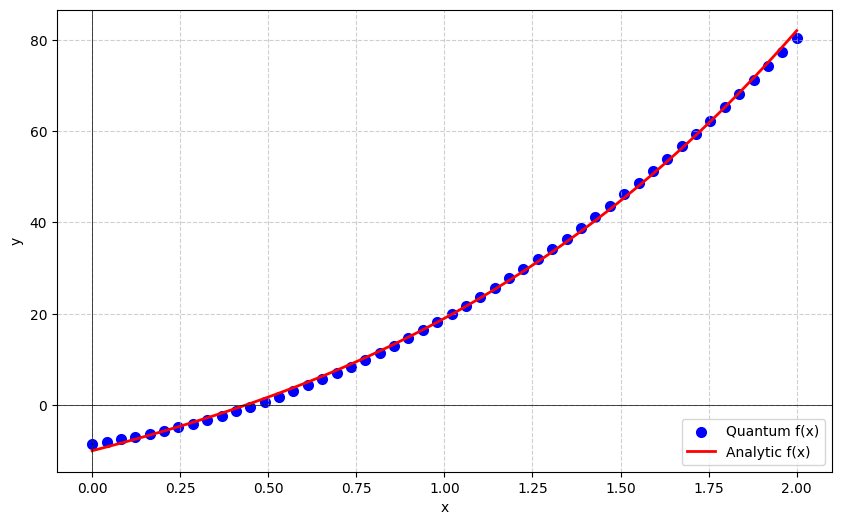

In [96]:

# Calculate corresponding y values for both functions
y1 = [f(x,theta,w) for x in t]
y2 = [f_test(x) for x in t]
# y2 = [del1_target_values[i] for i in range(len(t))]


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(t, y1, label='Quantum f(x)', linewidth=2, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=2, color='r')  # Plot the second function
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
# plt.title('Plot of Two Functions')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
# plt.ylim([-5, 10])  # Set y-axis limits
